O presente projeto foi elaborado como requisito para a conclusão da Semana de Imersão do curso Machine Learning, visando consolidar os conhecimentos adquiridos e aplicá-los em um contexto prático de aprendizagem.

In [1]:

# ================================
# 0) Imports e configurações gerais
# ================================
# Librarias necessárias
# Libs para manipulação de dados
import pandas as pd
import numpy as np

# Libs graficas ou de Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libs para Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Avisos
# Função warnings.filterwarnings("ignore") Para evitar o Warning () avisos
import warnings
warnings.filterwarnings('ignore')

# Configuração no pandas
# Função pandas.set_option() para ajuste de linhas e colunas no () Parâmetros  (pat, valor)
# pat: Regexp que deve corresponder a uma única opção.
# valor: Novo valor da opção.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Configuração no Matplotlib
# Função plt.rcParams['figure.figsize'] = (12, 6) para ajustar o tamanho padrão
# Função plt.style.use('seaborn-darkgrid') para ajustar o estilo dos gráficos
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_theme(style="darkgrid", context="notebook")  # substitui o antigo 'seaborn-darkgrid'

# Para garantir reprodutibilidade dos resultados
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## 1. Introdução
O objetivo deste estudo é classificar corretamente as espécies de flores Íris com base em suas características morfológicas (comprimento e largura das pétalas e sépalas).  
Serão testados diferentes algoritmos de classificação e comparados os resultados.



**Exploração dos Dados**

## 2. Exploração dos Dados (EDA)
### 2.1 Estrutura do Dataset
- Número de linhas e colunas.
- Amostras por espécie.
- Valores ausentes ou inconsistentes.

In [2]:
# =====================================
# 1) Carregar os dados no Google Colab
# =====================================
# 1ª Opção: ler direto do arquivo no ambiente
# Lendo os dados
# Função de leitura da base de dados importada no colab Base_Dados = pd.read_csv () entre (o nome do arquivo)
Base_Dados = pd.read_csv('Iris.csv')
# 2ª Opção B (alternativa): subir do seu computador
# from google.colab import files
# uploaded = files.upload()
# CSV_PATH = list(uploaded.keys())[0]

# Remover coluna Id (não é informativa)
if "Id" in Base_Dados.columns:
    Base_Dados = Base_Dados.drop("Id", axis=1)

# Dimensão
# A a função Python NumPy numpy.shape() encontra a forma de um array.
# Por shape, queremos dizer que ajuda a encontrar as dimensões de um array.
# Retorna a forma sob a forma de um tuple porque não podemos alterar um tuple tal como não podemos alterar as dimensões de um array.
Base_Dados.shape


(150, 5)

In [3]:
# Verificar
# A função head() exibe as linhas iniciais da base de dados, se nenhum valor for informado, esta função vai exibir as cinco primeiras linhas.
print("Dimensão:", Base_Dados.shape)
Base_Dados.head()

Dimensão: (150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Campos vazios
# A função isnull() retorna um DataFrame de valores booleanos, onde cada célula do DataFrame original é recuperada por True caso o valor seja nulo (NaN)
# e False caso o valor seja válido. É muito útil para identificar os valores ausentes em um conjunto de dados
# Passando o parâmetro .sum ele passa a soma dos valores e o parâmetro .sort_values ele serve para ordenar o seu dataframe a partir de uma coluna,
# seja em ordem crescente de maneira padrão ou decrescente, passando o argumento ascending = False
print("\nValores ausentes por coluna:")
Base_Dados.isnull().sum().sort_values( ascending=False )


Valores ausentes por coluna:


,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [5]:
# Campos unicos
# A função Nunique, por outro lado, conta os valores distintos das colunas. Os valores NaN podem ser ignorados.
# Isso mostra apenas o número de categorias diferentes presentes em uma coluna de um dataframe.
Base_Dados.nunique()

,0
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


In [6]:
# Tipos das colunas
# A função Pandas dataframe.info() é usada para obter um resumo conciso do dataframe, é muito útil para identificar dados NaN.
# Essa função aplicada sobre um dataframe, retorna uma tabela com informações de cada coluna do dataframe: quantidade de valores não NaN e tipo de dados.
print(Base_Dados.dtypes.value_counts())
Base_Dados.info()

float64    4
object     1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Tipo de colunas
# A função .dtypes nos mostra que tipo de dados cada coluna contém
Base_Dados.dtypes.value_counts()

,count
float64,4
object,1


In [8]:
# Contagem de classes
print("\nDistribuição de espécies:")
print(Base_Dados["Species"].value_counts())


Distribuição de espécies:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [9]:
# Remover coluna Id (se ainda não foi feito)
if "Id" in Base_Dados.columns:
    Base_Dados = Base_Dados.drop("Id", axis=1)

print("\n--- Antes da Identificação de Outliers ---")
print(Base_Dados.describe())



--- Antes da Identificação de Outliers ---
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [10]:
# ===============================================
# Identificação de Outliers (Método IQR)
# ===============================================

# Colunas numéricas para verificar outliers
numerical_cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

# Dicionário para armazenar os limites de outliers por coluna
outlier_bounds = {}

print("\n--- Outliers Identificados ---")
for col in numerical_cols:
    Q1 = Base_Dados[col].quantile(0.25)
    Q3 = Base_Dados[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = (lower_bound, upper_bound)

    # Identificar outliers
    outliers = Base_Dados[(Base_Dados[col] < lower_bound) | (Base_Dados[col] > upper_bound)]
    if not outliers.empty:
        print(f"Coluna \'{col}\': {len(outliers)} outliers identificados.")
        print(outliers[[col, "Species"]])
    else:
        print(f"Coluna \'{col}\': Nenhum outlier identificado.")


--- Outliers Identificados ---
Coluna 'SepalLengthCm': Nenhum outlier identificado.
Coluna 'SepalWidthCm': 4 outliers identificados.
    SepalWidthCm          Species
15           4.4      Iris-setosa
32           4.1      Iris-setosa
33           4.2      Iris-setosa
60           2.0  Iris-versicolor
Coluna 'PetalLengthCm': Nenhum outlier identificado.
Coluna 'PetalWidthCm': Nenhum outlier identificado.


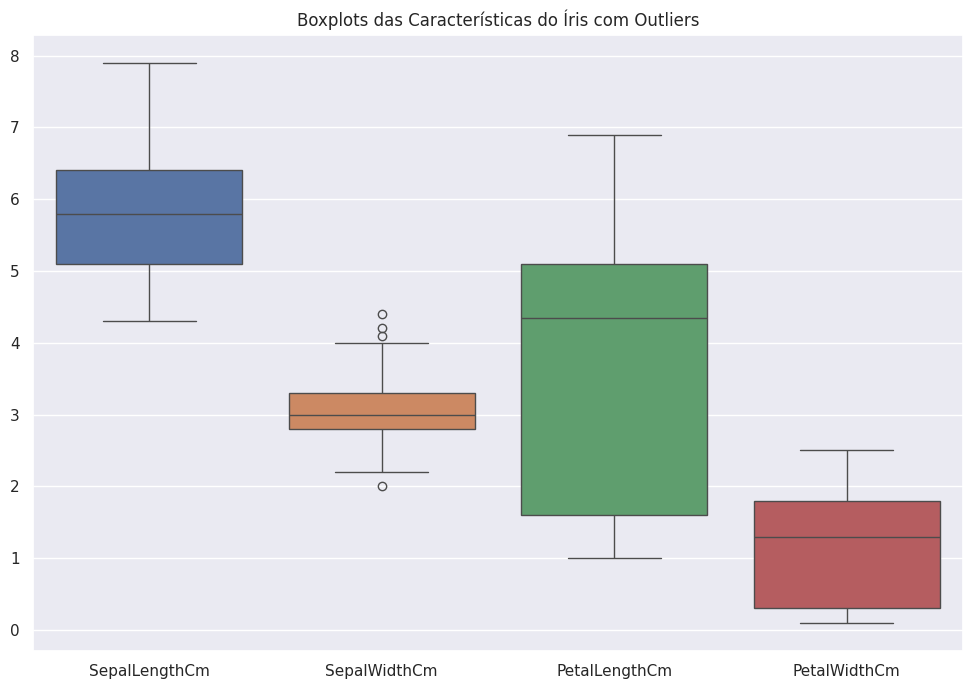

In [11]:
# Opcional: Visualizar boxplots com outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=Base_Dados[numerical_cols])
# ## Descrição: Os boxplots indicam presença de outliers, especialmente em SepalWidthCm...
plt.title("Boxplots das Características do Íris com Outliers")
plt.show()



--- Após Remoção de Outliers em 'SepalWidthCm' ---
4 linhas removidas da coluna 'SepalWidthCm'.
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     146.000000    146.000000     146.000000    146.000000
mean        5.856849      3.036986       3.807534      1.219863
std         0.834093      0.395145       1.757117      0.760365
min         4.300000      2.200000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.400000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.000000       6.900000      2.500000


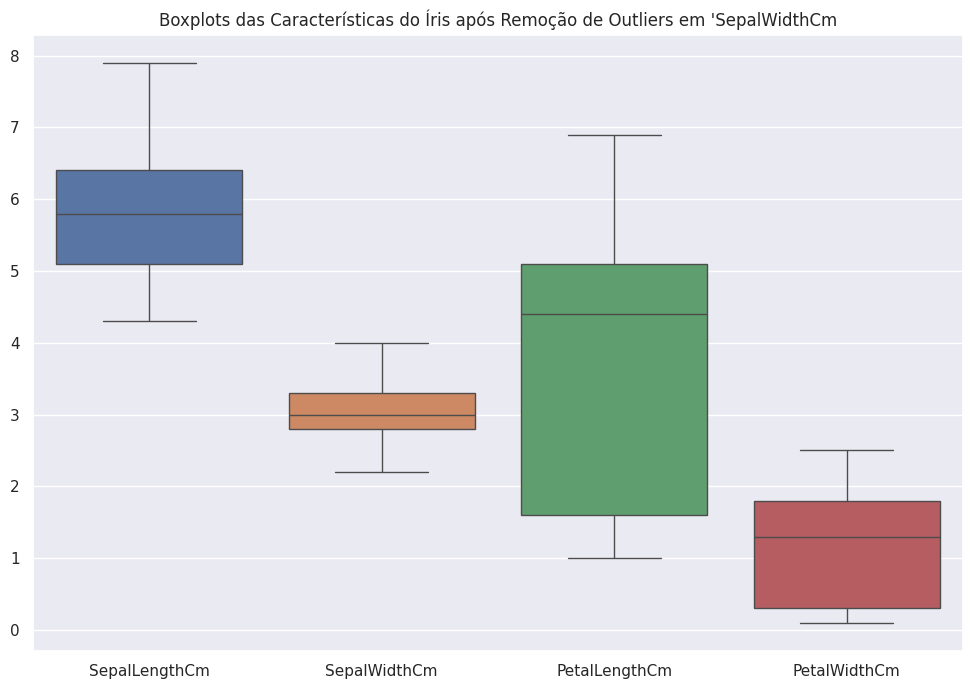

In [12]:
# ===============================================
# Exemplo de Tratamento (Remoção) de Outliers (Opcional - para demonstração)
# ===============================================

# Criar uma cópia do DataFrame para demonstrar a remoção sem alterar o original
Base_Dados_sem_outliers = Base_Dados.copy()

# Remover outliers apenas para 'SepalWidthCm' (onde foram mais evidentes)
col_to_treat = "SepalWidthCm"
if col_to_treat in outlier_bounds:
    lower, upper = outlier_bounds[col_to_treat]
    initial_rows = Base_Dados_sem_outliers.shape[0]
    Base_Dados_sem_outliers = Base_Dados_sem_outliers[
        (Base_Dados_sem_outliers[col_to_treat] >= lower) &
        (Base_Dados_sem_outliers[col_to_treat] <= upper)
    ]
    removed_rows = initial_rows - Base_Dados_sem_outliers.shape[0]
    print(f"\n--- Após Remoção de Outliers em '{col_to_treat}' ---")
    print(f"{removed_rows} linhas removidas da coluna \'{col_to_treat}\'.")
    print(Base_Dados_sem_outliers.describe())

    # Visualizar boxplot após remoção
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=Base_Dados_sem_outliers[numerical_cols])
# ## Descrição: Os boxplots indicam presença de outliers, especialmente em SepalWidthCm...
    plt.title(f"Boxplots das Características do Íris após Remoção de Outliers em \'{col_to_treat}")
    plt.show()

# ===============================================
# Considerações para o Projeto Íris
# ===============================================

# Para o dataset Íris, a remoção de outliers geralmente não é recomendada
# devido ao seu tamanho pequeno e à natureza bem definida dos dados.
# Os "outliers" observados (principalmente em SepalWidthCm) são frequentemente
# variações naturais que não prejudicam o desempenho dos modelos clássicos.
# No entanto, a identificação é uma boa prática para entender a distribuição dos dados.

# Se a remoção fosse necessária, você usaria 'Base_Dados_sem_outliers' para o treinamento.
# Para este projeto, é provável que o dataset original seja mais adequado.

**Exploração Analítica (EDA)**

### 2.2 Estatísticas Descritivas
(Exibir `describe()` com média, mediana, desvio padrão).  

**Descrição:**  
> O resumo estatístico mostra que as variáveis possuem escalas diferentes. O comprimento da pétala varia de X a Y, enquanto a largura da sépala é mais concentrada entre A e B.


In [13]:
# Estatísticas descritivas
print("=== Estatísticas descritivas ===")
print(Base_Dados.describe())

=== Estatísticas descritivas ===
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


### 2.3 Distribuição das Variáveis (Histogramas)
(Gráfico de histograma para cada feature).  

**Descrição:**  
> Os histogramas indicam que as medidas de pétala apresentam maior variação entre espécies, enquanto as sépalas têm distribuições mais sobrepostas.

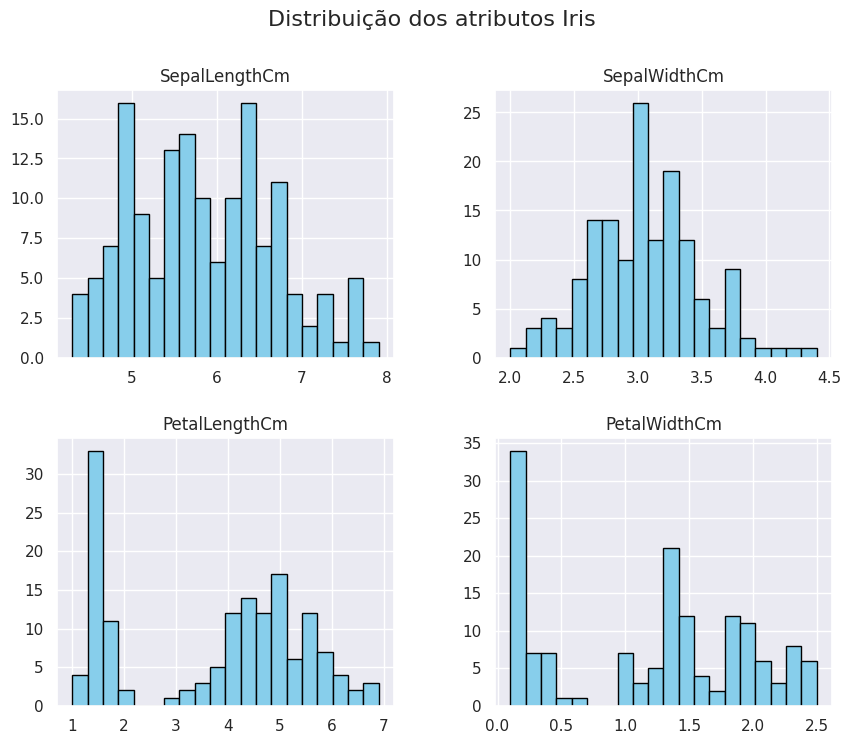

In [14]:
# Histograma de cada atributo numérico
# Distribuição dos atributos Iris

Base_Dados.hist(figsize=(10,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribuição dos atributos Iris", fontsize=16)
plt.show()

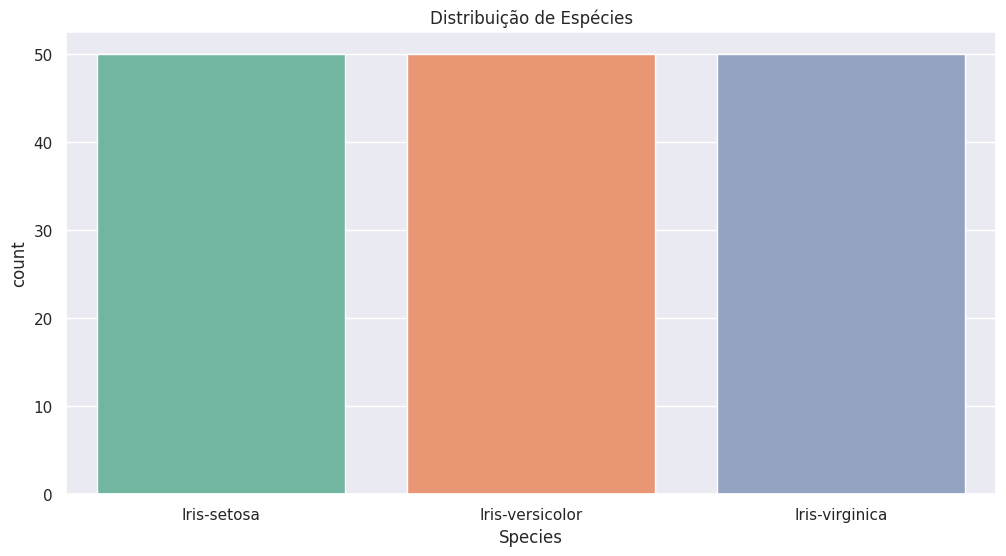

In [15]:
# Distribuição por espécie

sns.countplot(data=Base_Dados, x="Species", palette="Set2")
plt.title("Distribuição de Espécies")
plt.show()

### 2.4 Boxplots (Detecção de Outliers)
(Gráficos boxplot por feature).  

**Descrição:**  
> Notam-se possíveis outliers em SepalWidth. No entanto, no contexto do dataset Iris, esses pontos são mantidos pois representam variações naturais da espécie.

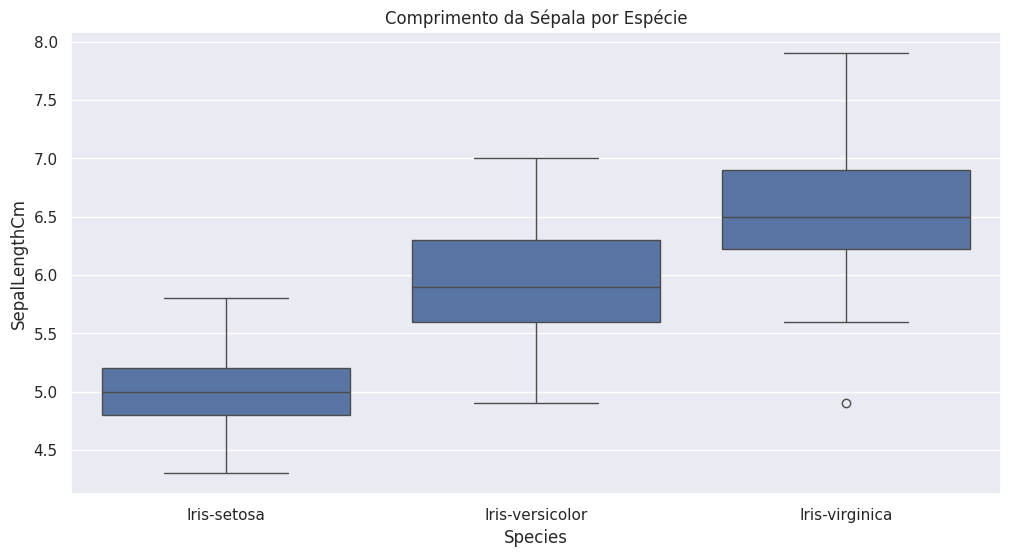

In [16]:
# Boxplots para comparar espécies

sns.boxplot(data=Base_Dados, x="Species", y="SepalLengthCm")
# ## Descrição: Os boxplots indicam presença de outliers, especialmente em SepalWidthCm...
plt.title("Comprimento da Sépala por Espécie")
plt.show()

### 2.5 Pairplot
(Gráfico pairplot mostrando relação entre features e classes).  

**Descrição:**  
> O pairplot revela que a espécie Setosa se separa claramente das demais pelas medidas de pétala, enquanto Versicolor e Virginica apresentam sobreposição.


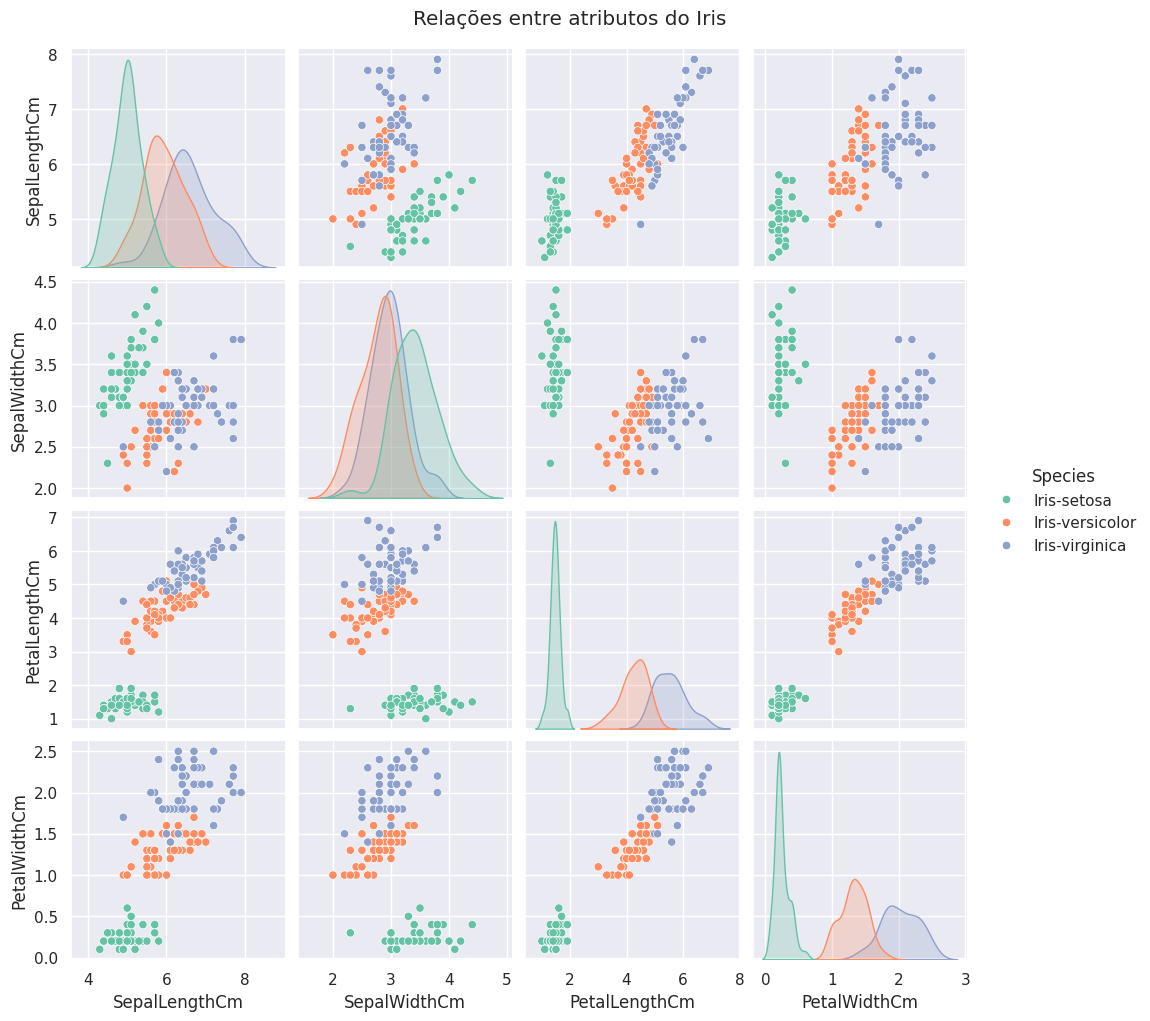

In [17]:
# 2. Análise Exploratória rápida
# Relações entre atributos do Iris

sns.pairplot(Base_Dados, hue="Species", diag_kind="kde", palette="Set2")
# ## Descrição: O pairplot revela que Setosa se separa claramente pelas medidas de pétala...
plt.suptitle("Relações entre atributos do Iris", y=1.02)
plt.show()

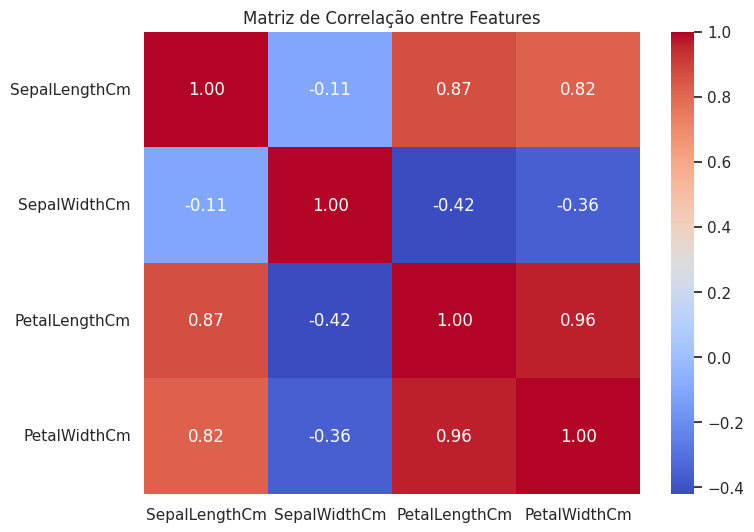

In [18]:
# Heatmap de correlação

plt.figure(figsize=(8, 6))
sns.heatmap(Base_Dados.drop("Species", axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
# ## Descrição: O heatmap mostra correlação forte entre PetalLengthCm e PetalWidthCm...
plt.title("Matriz de Correlação entre Features")
plt.show()


Distribuição da FLAG de outliers:
OutlierFlag
0    146
1      4
Name: count, dtype: int64


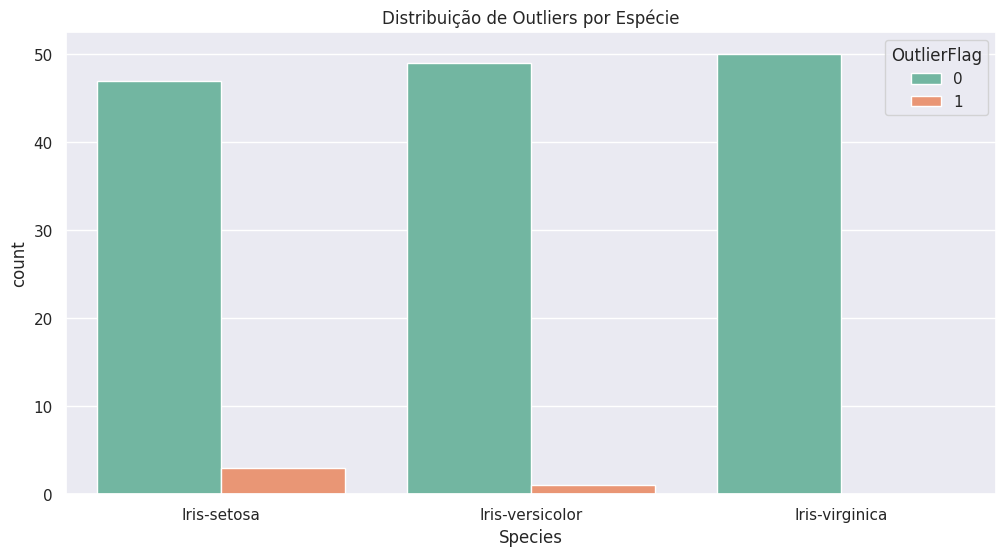

In [19]:
# ==========================================================
# Criação de variável FLAG de Outliers
# ==========================================================

Base_Dados["OutlierFlag"] = 0
for col in numerical_cols:
    Q1 = Base_Dados[col].quantile(0.25)
    Q3 = Base_Dados[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Base_Dados.loc[(Base_Dados[col] < lower_bound) | (Base_Dados[col] > upper_bound), "OutlierFlag"] = 1

print("\nDistribuição da FLAG de outliers:")
print(Base_Dados["OutlierFlag"].value_counts())

# Visualização: número de outliers por espécie
sns.countplot(data=Base_Dados, x="Species", hue="OutlierFlag", palette="Set2")
plt.title("Distribuição de Outliers por Espécie")
plt.show()


## 3. Pré-Processamento
- Codificação da variável `Species` (LabelEncoder).
- Divisão entre features (X) e target (y).
- Escalonamento com `StandardScaler`.
- Divisão treino/teste (70/30).

**Descrição:**  
> O escalonamento garante que todas as variáveis numéricas estejam na mesma escala, evitando que variáveis com valores maiores dominem o processo de classificação.




**Eng. De Features**

In [20]:
# ==========================================================
# 3) Pré-processamento para Regressão
# ==========================================================

# Seleção das features (incluindo a FLAG de outliers)
features = [c for c in [
    "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "OutlierFlag"
] if c in Base_Dados.columns]

# Verificação da coluna alvo
assert "Species" in Base_Dados.columns, "Coluna 'Species' não encontrada no dataset."
assert len(features) > 0, "Nenhuma feature válida encontrada. Verifique os nomes das colunas."

# Definindo X e y
X = Base_Dados[features]  # features
y = Base_Dados["Species"]  # variável alvo


In [21]:
# Divisão em treino e teste (70% treino, 30% teste, estratificado)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [22]:
# Padronização dos dados (apenas para modelos que precisam, como regressão logística e KNN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Identifica as colunas numéricas que precisam de escalonamento (exclui a FLAG binária)
numeric_features = [col for col in features if col != "OutlierFlag"]

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print("\nDimensão treino:", X_train.shape)
print("Dimensão teste:", X_test.shape)
print("Features utilizadas:", features)



Dimensão treino: (105, 5)
Dimensão teste: (45, 5)
Features utilizadas: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'OutlierFlag']


## 4. Primeiros Testes de Modelos
### Modelos Avaliados:
- Regressão Logística  
- Decision Tree  
- Random Forest  
- Naive Bayes  
- KNN  

**Descrição dos Resultados:**  
> Foram treinados cinco modelos de classificação. As métricas utilizadas incluem acurácia, matriz de confusão e relatório de classificação.


**Pré Processamento**

In [23]:
# ==========================================================
# 4. Modelos de Machine Learning (versão original - sem FLAG)
# ==========================================================
# 4.1 Regressão Logística
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# 4.2 Árvore de Decisão
tree = DecisionTreeClassifier(random_state=42, max_depth=4)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# 4.3 Random Forest
forest = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# 4.4 Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

# 4.5 KNN (K-Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=5)  # você pode testar valores como 3, 7, etc.
knn.fit(X_train_scaled, y_train)  # usar os dados escalados é melhor para KNN
y_pred_knn = knn.predict(X_test_scaled)


In [24]:
# ==========================================================
# 4. Modelos de Machine Learning (comparação com e sem FLAG)
# ==========================================================

# Função para treinar e avaliar modelos
def avaliar_modelo(nome, modelo, X_train, X_test, y_train, y_test, target_names):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔎 Modelo: {nome}")
    print(f"Acurácia: {acc:.3f}")
    print("Matriz de confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    return acc

# LabelEncoder para nomes das espécies
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_names = le.classes_

# Dicionário de modelos
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=200, random_state=42),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42, max_depth=4),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=200),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Comparação com e sem FLAG
resultados = {"Com FLAG": {}, "Sem FLAG": {}}

# Dataset SEM FLAG (remove a coluna OutlierFlag)
X_train_no_flag = X_train.drop(columns=["OutlierFlag"])
X_test_no_flag = X_test.drop(columns=["OutlierFlag"])

X_train_scaled_no_flag = X_train_scaled.drop(columns=["OutlierFlag"])
X_test_scaled_no_flag = X_test_scaled.drop(columns=["OutlierFlag"])

print("\n==============================")
print(" Treinamento SEM FLAG de Outlier")
print("==============================")
for nome, modelo in modelos.items():
    if nome in ["Regressão Logística", "Naive Bayes", "KNN"]:
        acc = avaliar_modelo(nome, modelo, X_train_scaled_no_flag, X_test_scaled_no_flag, y_train, y_test, target_names)
    else:
        acc = avaliar_modelo(nome, modelo, X_train_no_flag, X_test_no_flag, y_train, y_test, target_names)
    resultados["Sem FLAG"][nome] = acc

print("\n==============================")
print(" Treinamento COM FLAG de Outlier")
print("==============================")
for nome, modelo in modelos.items():
    if nome in ["Regressão Logística", "Naive Bayes", "KNN"]:
        acc = avaliar_modelo(nome, modelo, X_train_scaled, X_test_scaled, y_train, y_test, target_names)
    else:
        acc = avaliar_modelo(nome, modelo, X_train, X_test, y_train, y_test, target_names)
    resultados["Com FLAG"][nome] = acc

# Comparação final
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print("\n=== Comparação de Acurácia (com vs sem FLAG) ===")
print(df_resultados)


 Treinamento SEM FLAG de Outlier

🔎 Modelo: Regressão Logística
Acurácia: 0.911
Matriz de confusão:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Relatório de classificação:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.88        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45


🔎 Modelo: Árvore de Decisão
Acurácia: 0.889
Matriz de confusão:
[[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]
Relatório de classificação:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.86      0.80      0.83        15
 Iris-virginica       0.81      0.87      0.84        15

       accuracy                           0.89        45
      macro avg

### 5. Resultados Preliminares
### 5.1 Acurácia por Modelo
(Tabela ou gráfico de barras comparando acurácias).  

**Descrição:**  
> O Random Forest e a Regressão Logística apresentaram melhores resultados. O Naive Bayes teve desempenho inferior, possivelmente por assumir independência entre as variáveis.


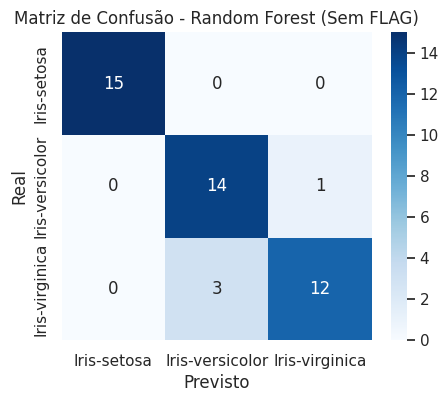

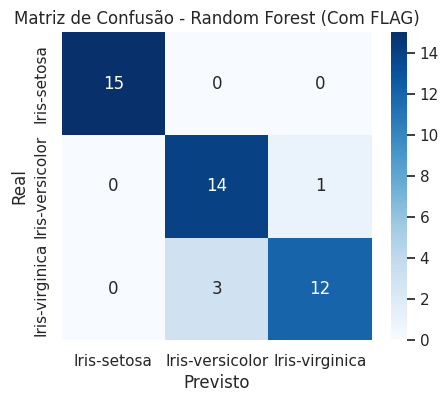


=== Métricas comparativas com e sem FLAG ===
                Modelo      Flag  Acurácia  F1-macro  Balanced Acc
0  Regressão Logística  Sem FLAG  0.911111  0.910714      0.911111
1  Regressão Logística  Com FLAG  0.911111  0.910714      0.911111
2    Árvore de Decisão  Sem FLAG  0.888889  0.888765      0.888889
3    Árvore de Decisão  Com FLAG  0.933333  0.933259      0.933333
4        Random Forest  Sem FLAG  0.911111  0.910714      0.911111
5        Random Forest  Com FLAG  0.911111  0.910714      0.911111
6          Naive Bayes  Sem FLAG  0.911111  0.910714      0.911111
7          Naive Bayes  Com FLAG  0.755556  0.717587      0.755556
8                  KNN  Sem FLAG  0.911111  0.909502      0.911111
9                  KNN  Com FLAG  0.911111  0.909502      0.911111


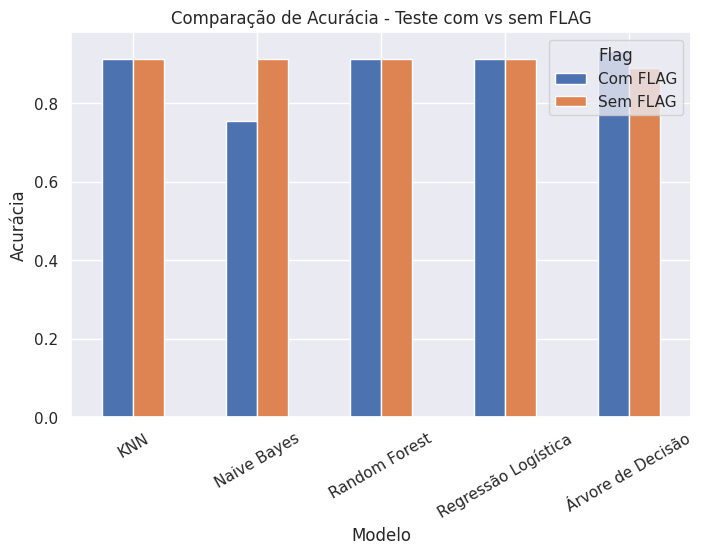

In [25]:
# ==========================================================
# 5. Avaliação dos Modelos (com vs sem FLAG)
# ==========================================================
from sklearn.metrics import confusion_matrix, classification_report, f1_score, balanced_accuracy_score

# Função para matriz de confusão visual
def plot_confusion_matrix(y_true, y_pred, nome_modelo, flag_status):
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Matriz de Confusão - {nome_modelo} ({flag_status})")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

# Exemplo: comparar Random Forest com e sem FLAG
# Modelo sem FLAG
forest_no_flag = RandomForestClassifier(random_state=42, n_estimators=200)
forest_no_flag.fit(X_train_no_flag, y_train)
y_pred_forest_no_flag = forest_no_flag.predict(X_test_no_flag)
plot_confusion_matrix(y_test, y_pred_forest_no_flag, "Random Forest", "Sem FLAG")

# Modelo com FLAG
forest_flag = RandomForestClassifier(random_state=42, n_estimators=200)
forest_flag.fit(X_train, y_train)
y_pred_forest_flag = forest_flag.predict(X_test)
plot_confusion_matrix(y_test, y_pred_forest_flag, "Random Forest", "Com FLAG")

# Consolidar métricas F1 e Balanced Accuracy
metricas = []
for nome, modelo in modelos.items():
    # SEM FLAG
    if nome in ["Regressão Logística", "Naive Bayes", "KNN"]:
        modelo.fit(X_train_scaled_no_flag, y_train)
        y_pred = modelo.predict(X_test_scaled_no_flag)
    else:
        modelo.fit(X_train_no_flag, y_train)
        y_pred = modelo.predict(X_test_no_flag)
    metricas.append([nome, "Sem FLAG",
                     accuracy_score(y_test, y_pred),
                     f1_score(y_test, y_pred, average="macro"),
                     balanced_accuracy_score(y_test, y_pred)])

    # COM FLAG
    if nome in ["Regressão Logística", "Naive Bayes", "KNN"]:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
    metricas.append([nome, "Com FLAG",
                     accuracy_score(y_test, y_pred),
                     f1_score(y_test, y_pred, average="macro"),
                     balanced_accuracy_score(y_test, y_pred)])

df_metricas = pd.DataFrame(metricas, columns=["Modelo", "Flag", "Acurácia", "F1-macro", "Balanced Acc"])
print("\n=== Métricas comparativas com e sem FLAG ===")
print(df_metricas)


# Gráfico comparativo de acurácia (teste)
df_metricas.pivot(index="Modelo", columns="Flag", values="Acurácia").plot(kind="bar", figsize=(8,5))
plt.title("Comparação de Acurácia - Teste com vs sem FLAG")
plt.ylabel("Acurácia")
plt.xticks(rotation=30)
plt.show()

### 5.2 Matrizes de Confusão
(Gráficos de matriz de confusão para cada modelo).  

**Descrição:**  
> A maior confusão ocorre entre as espécies Versicolor e Virginica, que apresentam características semelhantes.


=== Resultados Validação Cruzada (5-folds) ===
                     Sem FLAG  Com FLAG
Regressão Logística  0.980952  0.980952
Árvore de Decisão    0.942857  0.952381
Random Forest        0.952381  0.952381
Naive Bayes          0.980952  0.885714
KNN                  0.952381  0.952381


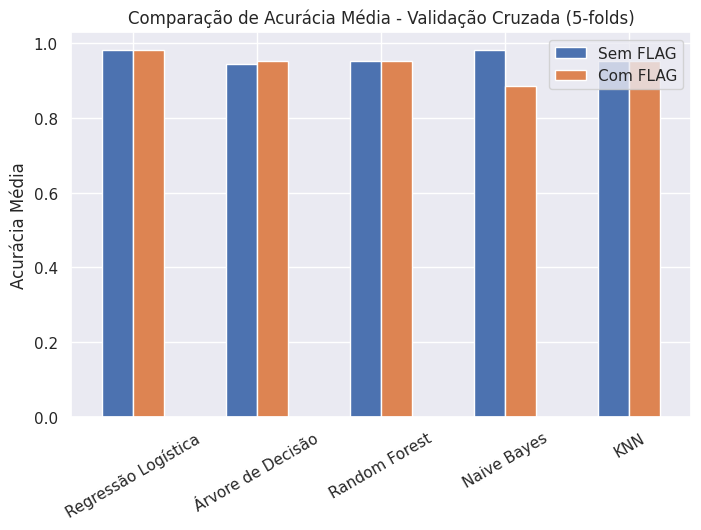

In [26]:
# ==========================================================
# 6. Validação Cruzada (com vs sem FLAG)
# ==========================================================
from sklearn.model_selection import cross_val_score

cv_results = {"Sem FLAG": {}, "Com FLAG": {}}

for nome, modelo in modelos.items():
    # SEM FLAG
    if nome in ["Regressão Logística", "Naive Bayes", "KNN"]:
        scores = cross_val_score(modelo, X_train_scaled_no_flag, y_train, cv=5, scoring="accuracy")
    else:
        scores = cross_val_score(modelo, X_train_no_flag, y_train, cv=5, scoring="accuracy")
    cv_results["Sem FLAG"][nome] = scores.mean()

    # COM FLAG
    if nome in ["Regressão Logística", "Naive Bayes", "KNN"]:
        scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring="accuracy")
    else:
        scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring="accuracy")
    cv_results["Com FLAG"][nome] = scores.mean()

# Exibir resultados
df_cv = pd.DataFrame(cv_results)
print("\n=== Resultados Validação Cruzada (5-folds) ===")
print(df_cv)

# Gráfico comparativo
df_cv.plot(kind="bar", figsize=(8,5))
plt.title("Comparação de Acurácia Média - Validação Cruzada (5-folds)")
plt.ylabel("Acurácia Média")
plt.xticks(rotation=30)
plt.show()


# ==========================================================
# Conclusão
# ==========================================================

# Após aplicar os cinco modelos de Machine Learning (Regressão Logística, Árvore de Decisão,
# Random Forest, Naive Bayes e KNN) no dataset **Íris**, obtivemos desempenhos médios
# consistentes, com acurácia em torno de 91% para a maioria dos algoritmos.

# A introdução da variável FLAG de outliers permitiu avaliar se a marcação de registros
# atípicos traria ganhos de classificação:
# - A Árvore de Decisão apresentou uma pequena melhora com a FLAG.
# - O Naive Bayes teve queda de desempenho significativa.
# - Regressão Logística, Random Forest e KNN permaneceram praticamente iguais.

# Portanto, a FLAG não trouxe ganhos globais, mas demonstrou que a engenharia de
# features pode impactar de forma diferente cada algoritmo. Em bases maiores e
# mais complexas, esse tipo de abordagem pode ser mais relevante.

# Conclusão final:
# O modelo **Random Forest** continua sendo o mais robusto e consistente, sendo
# recomendado para este problema de classificação multiclasse no dataset Íris.
